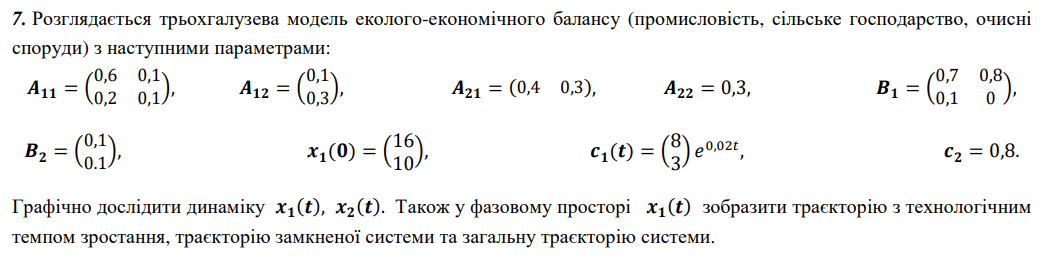

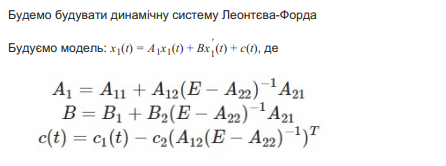

In [1]:
from sympy import *

A11 = Matrix([[0.6, 0.1],
              [0.2, 0.1]])
A12 = Matrix([0.1, 0.3])
A21 = Matrix([[0.4, 0.3]])
A22 = Matrix([0.3])

B1 = Matrix([[0.7, 0.8],
             [0.1, 0]])
B2 = Matrix([0.1, 0.1])

E = Matrix.eye(1)

c1 = lambda t: Matrix([8, 3]) * exp(0.02*t)
c2 = 0.8

A1 = A11 + A12 * (E - A22).inv() * A21
B = B1 + B2 * (E - A22).inv() * A21

c = lambda t: c1(t) - c2 * (A12 * (E - A22).inv())

In [2]:
A1.n(3)

Matrix([
[0.657, 0.143],
[0.371, 0.229]])

In [3]:
B.n(3)

Matrix([
[0.757,  0.843],
[0.157, 0.0429]])

Маємо диф. рівняння: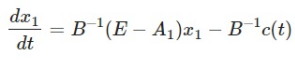

Щоб знайти x<sub>1</sub>(t) знаходимо розв’язок рівняння з початковим значенням x<sub>1</sub>(0)

Для знаходження x<sub>2</sub> використовуємо: 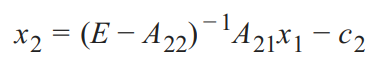

In [18]:
from sympy.solvers.ode.systems import dsolve_system

x10 = Function('x10')
x11 = Function('x11')
t = Symbol('t')
x1 = Matrix([x10(t), x11(t)])


eq = Eq(B.inv()*(Matrix.eye(2) - A1)*x1 - B.inv()*c(t), x1.diff(t))

solution = dsolve_system(
    [eq.lhs[0] - eq.rhs[0], eq.lhs[1] - eq.rhs[1]],
    [x10(t), x11(t)],
    ics={ x10(0): 16, x11(0): 10 }
)

s = lambda x: simplify(simplify(x))
x1 = Matrix([s(solution[0][0].rhs), s(solution[0][1].rhs)])

x1.xreplace({n : round(n, 3) for n in x1.atoms(Number)})

Matrix([
[-18.091*exp(-0.221*t)**(-1.0) - 0.924*exp(-0.221*t)**(-1.0)*exp(-0.221*t) + 36.002*exp(-0.221*t)**(-1.0)*exp(-0.201*t) - 1.525*exp(0.02*t) + 0.276 + 0.263*exp(-9.564*t)],
[ -9.643*exp(-0.221*t)**(-1.0) - 0.493*exp(-0.221*t)**(-1.0)*exp(-0.221*t) + 19.191*exp(-0.221*t)**(-1.0)*exp(-0.201*t) + 1.461*exp(0.02*t) - 0.264 - 0.252*exp(-9.564*t)]])

In [23]:
x2 = (E - A22).inv() * A21 * x1 - Matrix([c2])
x2[0].xreplace({n : round(n, 3) for n in x2.atoms(Number)})

-14.47*exp(-0.221*t)**(-1.0) - 0.739*exp(-0.221*t)**(-1.0)*exp(-0.221*t) + 28.797*exp(-0.221*t)**(-1.0)*exp(-0.201*t) - 0.245*exp(0.02*t) - 0.756 + 0.042*exp(-9.564*t)

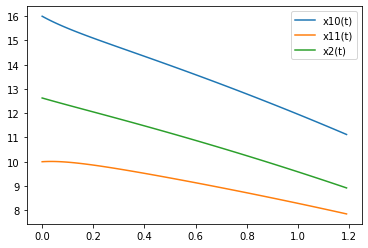

In [15]:
import matplotlib.pyplot as plt
import numpy as np
ts = np.arange(0, 1.2, 0.01)
x10_t = [x1[0].subs({t: i}).n(4) for i in ts]
x11_t = [x1[1].subs({t: i}).n(4) for i in ts]
x2_t = [x2[0].subs({t: i}).n(4) for i in ts]
plt.plot(ts, x10_t, label='x10(t)')
plt.plot(ts, x11_t, label='x11(t)')
plt.plot(ts, x2_t, label='x2(t)')
plt.legend()
plt.show()

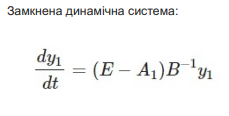

In [20]:
y10 = Function('y10')
y11 = Function('y11')
y1 = Matrix([y10(t), y11(t)])

eq = Eq((Matrix.eye(2) - A1)*B.inv()*y1, y1.diff(t))

solution = dsolve_system(
    [eq.lhs[0] - eq.rhs[0], eq.lhs[1] - eq.rhs[1]],
    [y10(t), y11(t)],
    ics={ y10(0): 16, y11(0): 10 }
)

y1 = Matrix([s(solution[0][0].rhs), s(solution[0][1].rhs)])
y1.xreplace({n : round(n, 3) for n in y1.atoms(Number)})

Matrix([
[ (19.09*exp(9.785*t) - 3.09)*exp(-9.564*t)],
[(2.848*exp(9.785*t) + 7.152)*exp(-9.564*t)]])

In [22]:
y2 = (E - A22).inv() * A21 * y1 - Matrix([c2])
y2[0].xreplace({n : round(n, 3) for n in y2.atoms(Number)})

0.429*(2.848*exp(9.785*t) + 7.152)*exp(-9.564*t) + 0.571*(19.09*exp(9.785*t) - 3.09)*exp(-9.564*t) - 0.8

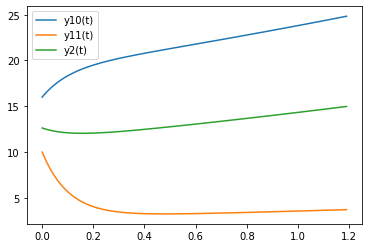

In [9]:
y10_t = [y1[0].subs({t: i}).n(4) for i in ts]
y11_t = [y1[1].subs({t: i}).n(4) for i in ts]
y2_t = [y2[0].subs({t: i}).n(4) for i in ts]

plt.plot(ts, y10_t, label='y10(t)')
plt.plot(ts, y11_t, label='y11(t)')
plt.plot(ts, y2_t, label='y2(t)')
plt.legend()
plt.show()

Коефіцієнт технологічного зростання:

In [10]:
eigenvals = ((Matrix.eye(2) - A1).inv() * B).eigenvals()
growth_factor = 1/max(eigenvals)
growth_factor.n(3)

0.221

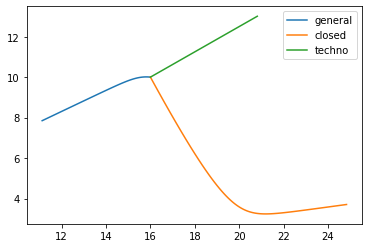

In [11]:
plt.plot(x10_t, x11_t, label='general')
plt.plot(y10_t, y11_t, label='closed')

g = np.exp(float(growth_factor)*ts)
plt.plot(g * 16, g * 10, label='techno')
plt.legend()
plt.show()